# Лаб. №4: визуализация данных с использованием библиотек python. Управление компоновкой диаграмм

Для анализа был выбран датасет "More Guns, Less Crime?", представляющий собой набор данных по 50 штатам США плюс округ Колумбия (в общей сложности 51 штат), с разбивкой по годам за 1977-1999 годы.


Описание датасета: https://vincentarelbundock.github.io/Rdatasets/doc/AER/Guns.html

# Описание данных

Данные являются многомерными, поскольку для каждого года фиксируется вектор наблюдений. Каждая запись характеризуется 13-ю признаками:

1) state - фактор, указывающий на штат;

2) year - год, к которому относятся данные;

3) violent - уровень насильственных преступлений (инциденты на 100 000 человек населения);

4) murder - уровень убийств (инцидент на 100 000);

5) robbery - частота ограблений (инцидент на 100 000);

6) prisoners - количество заключенных в предыдущем году (осужденные на 100 000 жителей; значение за предыдущий год);

7) afam - процент афроамериканцев от населения штата в возрасте от 10 до 64 лет;

8) caucasus - процент населения штата, являющегося европеоидом, в возрасте от 10 до 64 лет;

9) male - процентная доля мужского населения штата в возрасте от 10 до 29 лет;

10) population - население штата, в миллионах человек;

11) income - реальный личный доход на душу населения в штате (доллары США);

12) density - численность населения на квадратную милю площади суши, деленная на 1000;

13) law - фактор. Действует ли в этом году в штате закон о ношении оружия*?

*Закон о ношении оружия - это закон, который требует, чтобы правительства выдавали разрешения на скрытое ношение оружия любому заявителю, который соответствует необходимым критериям. Вторая поправка к Конституции Соединенных Штатов защищает право хранить и носить оружие, также известна как закон о ношении оружия.

In [ ]:
# импорт библиотек

import pandas as pd

In [ ]:
# чтение файла с диска и загрузка в датафрейм

path = "/content/drive/MyDrive/STUDY/Представление знаний и визуализация данных/Lab_4/Guns.csv"
df = pd.read_csv(path, index_col=0) #index_col=0 - убираем нумерацию строк
df.shape #размерность данных

(1173, 13)

# Типы признаков

In [ ]:
# вывод информации о признаках

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 1 to 1173
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1173 non-null   int64  
 1   violent     1173 non-null   float64
 2   murder      1173 non-null   float64
 3   robbery     1173 non-null   float64
 4   prisoners   1173 non-null   int64  
 5   afam        1173 non-null   float64
 6   cauc        1173 non-null   float64
 7   male        1173 non-null   float64
 8   population  1173 non-null   float64
 9   income      1173 non-null   float64
 10  density     1173 non-null   float64
 11  state       1173 non-null   object 
 12  law         1173 non-null   object 
dtypes: float64(9), int64(2), object(2)
memory usage: 128.3+ KB


Типы признаков:

1) state - номинальные категоризованные, неметрическая номинативная шкала;

2) year - номинальные категоризованные, неметрическая номинативная шкала;

3) violent - количественные, метрическая шкала отношений;

4) murder -  количественные, метрическая шкала отношений;

5) robbery -  количественные, метрическая шкала отношений;

6) prisoners -  количественные, метрическая шкала отношений;

7) afam - количественные, метрическая шкала отношений;

8) caucasus - количественные, метрическая шкала отношений;

9) male - количественные, метрическая шкала отношений;

10) population - количественные, абсолютная метрическая шкала;

11) income - количественные, метрическая шкала отношений;

12) density - количественные, метрическая шкала отношений;

13) law - номинальные категоризованные, неметрическая номинативная шкала;

# Группировка графиков

In [ ]:
# импорт библиотек
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## FacetGrid

На графике ниже показана зависимость преступности от доли афроамериканского населения штатов. По строкам разделение идет по году, в столбцах - по признаку 'law' (принят закон или нет).
График позволяет заметить, что несмотря на принятие закона точки выстраиваются в той же закономерности, которая была до принятия.

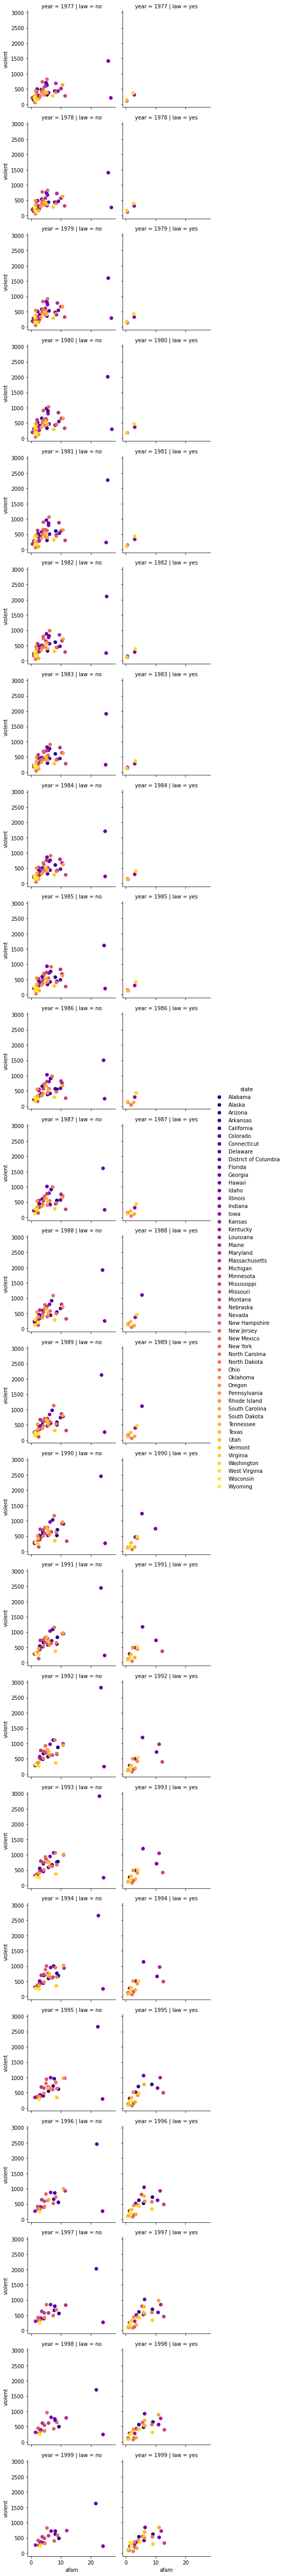

In [ ]:
fg = sns.FacetGrid(df, col="law", row="year",hue='state',palette='plasma')
fg.map(plt.scatter, "afam","violent").add_legend()

## PairGrid

На графике изображено попарное распределение признаков 'violent','prisoners' и 'afam' с визуальным разделением по году. 

График имеет угловой вид. По диагонали расположены гистограммы, под диагональю - диаграммы рассеяния.

In [ ]:
pair_data = df[['violent','prisoners','afam','year']]

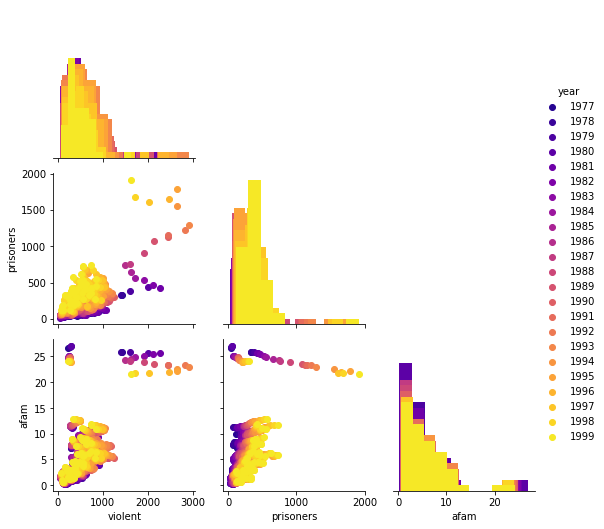

In [ ]:
pg = sns.PairGrid(pair_data, hue='year', palette = 'plasma',corner=True)

pg.map_diag(plt.hist)
pg.map_offdiag(plt.scatter).add_legend()


## JointGrid

График регрессии (зависимость уровня преступности от доли афроамериканского населения) и гистограммы признаков 'afam' и 'law'. 

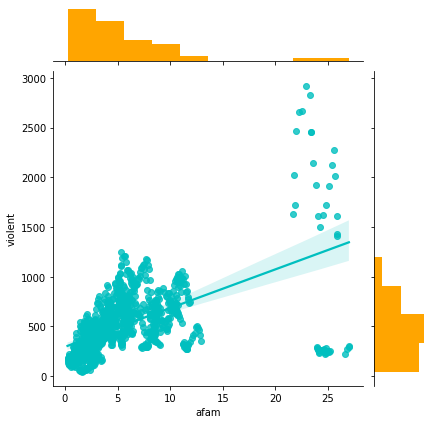

In [ ]:
jg = sns.JointGrid(x='afam', y='violent', data=df)

jg.plot_joint(sns.regplot, color="c")
jg.plot_marginals(plt.hist, color='orange')

Диаграмма рассеяния признаков 'male' и 'violent' с графиками плотнстей этих признаков. 

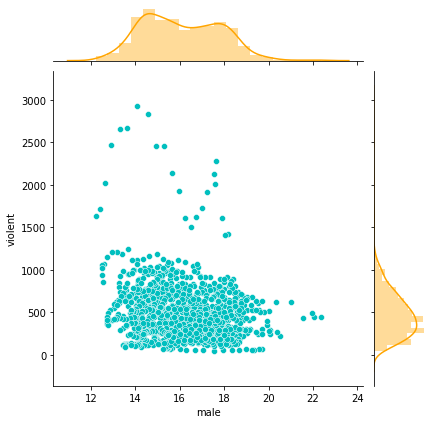

In [ ]:
jg = sns.JointGrid(x='male', y='violent', data=df)

jg.plot_joint(sns.scatterplot, color="c")
jg.plot_marginals(sns.distplot, color='orange')

# Выводы

Классы FacetGrid, PairGrid, JointGrid предоставляют функционал, схожий с тем, которые предоставляют одноименные функции, однако позволяют осуществить более тонкую и гибкую настройку параметров компоновки графиков. 